# Fraudulent Transactions Prediction

## Preparation phrase
 * Please go to https://www.kaggle.com/<your-username\>/account and scroll into API part. Choose `Create New API Token`. This will automatically download a json file contain your API Key with the name `kaggle.json`
 * Copy downloaded `kaggle.json` into your `$HOME/.kaggle/` directory.
 * Uncomment the second line in below cell
 * Run below cell to download the dataset

In [1]:
!kaggle datasets download vardhansiramdasu/fraudulent-transactions-prediction
#!unzip fraudulent-transactions-prediction.zip

fraudulent-transactions-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
# Necessary module for discover data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read the dataset.
df = pd.read_csv("Fraud.csv")
df.head(10)



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
# List of the columns 
list(df.columns)

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [5]:
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [6]:
df = df.dropna() 
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


We can see that there are no any "N/A" value in the table.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 582.5+ MB


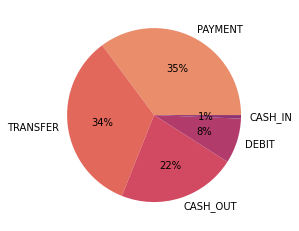

In [8]:
col_type = df.type
col_type_unique_value = df.type.unique().tolist()
percentages = (col_type.value_counts() / len(df)).tolist()
palette_color = sns.color_palette("flare")
  
# plotting data on chart
fig = plt.pie(percentages, labels=col_type_unique_value, colors=palette_color,
        autopct='%.0f%%')

In [9]:
# Value counts for the is_Fraud, we can see that the value of fraud transactions ~ 0.129082044 % the data, 
# which is kinds of imbalance - So if we use whole dataframe as input, we may consider F1-score to choose the best model
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

## We will try to analyze the payment method first

Here we can see that the payment method does not contain fraud transactions. Which is very nice to predict the result.

In [10]:
# Filter the type column to get whole payment ones
payment_df = df[df["type"] == "PAYMENT"]
payment_df[["type", "isFraud"]]["isFraud"].value_counts()



0    2151495
Name: isFraud, dtype: int64

## Now we can try for other transactions type


In [11]:
def type_with_fraud(df, TYPE):
    print(f"Analyze for {TYPE}-transaction")
    x_df = df[df["type"] == TYPE]
    print(f"Number of {TYPE}-transaction is about {round(len(x_df)/ len(df), 2) * 100} %")
    val_count = x_df[["isFraud"]].value_counts()
    print(val_count)
    if val_count[0] == len(x_df):
        return True
    return False
TYPES = list(df["type"].unique())
list_types = []
list_not = []
for t in TYPES:
    t_or_f = type_with_fraud(df, t)
    if t_or_f:
        list_types.append(t)
    else:
        list_not.append(t)
print(f"\n\n\nList of those types that not 100% not fraud {list_not}")    
print(f"\n\n\nList of those types that 100% not fraud {list_types}")        

Analyze for PAYMENT-transaction
Number of PAYMENT-transaction is about 34.0 %
isFraud
0          2151495
dtype: int64
Analyze for TRANSFER-transaction
Number of TRANSFER-transaction is about 8.0 %
isFraud
0          528812
1            4097
dtype: int64
Analyze for CASH_OUT-transaction
Number of CASH_OUT-transaction is about 35.0 %
isFraud
0          2233384
1             4116
dtype: int64
Analyze for DEBIT-transaction
Number of DEBIT-transaction is about 1.0 %
isFraud
0          41432
dtype: int64
Analyze for CASH_IN-transaction
Number of CASH_IN-transaction is about 22.0 %
isFraud
0          1399284
dtype: int64



List of those types that not 100% not fraud ['TRANSFER', 'CASH_OUT']



List of those types that 100% not fraud ['PAYMENT', 'DEBIT', 'CASH_IN']


In [12]:
def type_with_fraud_and_flagged(df, TYPE):
    print(f"Analyze for {TYPE}-transaction")
    x_df = df[df["type"] == TYPE]
    print(f"Number of {TYPE}-transaction is about {round(len(x_df)/ len(df), 2) * 100} %")
    val_count = x_df[["isFlaggedFraud"]].value_counts()
    print(val_count)
    if val_count[0] == len(x_df):
        return True
    return False
TYPES = list(df["type"].unique())
list_flagged_types = []
list_flagged_not = []
for t in TYPES:
    t_or_f = type_with_fraud_and_flagged(df, t)

    if t_or_f:
        list_flagged_types.append(t)
    else:
        list_flagged_not.append(t)
print(f"\n\n\nList of those types that not 100% not flagged_fraud {list_flagged_not}")    
print(f"\n\n\nList of those types that 100% not flagged_fraud {list_flagged_types}")       

Analyze for PAYMENT-transaction
Number of PAYMENT-transaction is about 34.0 %
isFlaggedFraud
0                 2151495
dtype: int64
Analyze for TRANSFER-transaction
Number of TRANSFER-transaction is about 8.0 %
isFlaggedFraud
0                 532893
1                     16
dtype: int64
Analyze for CASH_OUT-transaction
Number of CASH_OUT-transaction is about 35.0 %
isFlaggedFraud
0                 2237500
dtype: int64
Analyze for DEBIT-transaction
Number of DEBIT-transaction is about 1.0 %
isFlaggedFraud
0                 41432
dtype: int64
Analyze for CASH_IN-transaction
Number of CASH_IN-transaction is about 22.0 %
isFlaggedFraud
0                 1399284
dtype: int64



List of those types that not 100% not flagged_fraud ['TRANSFER']



List of those types that 100% not flagged_fraud ['PAYMENT', 'CASH_OUT', 'DEBIT', 'CASH_IN']


### Naive summary

* If the type of transactions is in **['PAYMENT', 'DEBIT', 'CASH_IN']** so the transaction will **NOT** be flagged as fraud

### Next step
I think maybe the fraud or not heavily depend on who was `orig` and who was `dest`. So I want to check those field.

In [13]:
#m_df will be the main dataframe that we use to predict between fraud or non-fraud transactions
# We can see that this dataframe contain ~ 43.54 % the original dataframe, so when we use this dataframe at main dataset to predict, it will be more efficient.
m_df = df.loc[df["type"].isin(list_not)]
m_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [14]:
name_m_df = m_df[["nameOrig","nameDest","isFraud", "isFlaggedFraud"]]
nameOrig_and_labels = name_m_df[["nameOrig", "isFraud"]]
nameOrig_and_labels_val_count = nameOrig_and_labels[name_m_df["isFraud"] == 1].value_counts()
nameOrig_and_labels_val_count

nameOrig     isFraud
C1000036340  1          1
C334503836   1          1
C357089378   1          1
C356905617   1          1
C356781229   1          1
                       ..
C1629072698  1          1
C162879753   1          1
C1628562361  1          1
C162812306   1          1
C99979309    1          1
Length: 8213, dtype: int64

In [15]:
nameDest_and_labels = name_m_df[["nameDest", "isFraud"]]
nameDest_and_labels_val_count = nameDest_and_labels[name_m_df["isFraud"] == 1].value_counts()
nameDest_and_labels_val_count

nameDest     isFraud
C2020337583  1          2
C650699445   1          2
C475338087   1          2
C505532836   1          2
C1185292292  1          2
                       ..
C1661119285  1          1
C1661087818  1          1
C1660826618  1          1
C1660783549  1          1
C999955448   1          1
Length: 8169, dtype: int64

After some naive analyze I have not see any pattern in the context of dataset.
* I **think** the `nameOrig` and the `nameDest` does look like the kind of `id` which does not generalize our solution if we have more transaction, so I will drop those field
* I does not drop the `oldbalanceDest` and `newBalanceDest` althrough about ~30% of data will do not affected but our consideration is on 2 type `TRANSFER` and `CASH_OUT`
* But we will not use both features because I think our model can learn relationship between `newbalanceOrg` and `oldbalanceDest` base on `type`

In [16]:
drop_m_df = m_df.drop(columns = ["isFraud", "newbalanceDest","nameDest", "nameOrig"])
drop_m_df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,isFlaggedFraud
2,1,TRANSFER,181.00,181.00,0.0,0.00,0
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0
15,1,CASH_OUT,229133.94,15325.00,0.0,5083.00,0
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,0
...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,0
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0


In [17]:
fraud_and_flagged = m_df[["isFraud", "isFlaggedFraud"]]
corr = fraud_and_flagged.corr()
corr

,isFraud,isFlaggedFraud
isFraud,1.000000,0.044072
isFlaggedFraud,0.044072,1.000000


In [18]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, Normalizer, StandardScaler, MinMaxScaler
    

In [19]:
labelize = LabelEncoder()
standard_scaler = StandardScaler()
normalizer = Normalizer(norm="l2")
minmax = MinMaxScaler()
drop_m_df.type = labelize.fit_transform(drop_m_df.type) # Transform the type
drop_m_df.step = minmax.fit_transform(drop_m_df.step.to_numpy().reshape(-1,1)) #Scale the time to 0 - 1

drop_m_df[["amount", "oldbalanceOrg", "oldbalanceDest"]] = standard_scaler.fit_transform(drop_m_df[["amount", "oldbalanceOrg", "oldbalanceDest"]].to_numpy().reshape(-1,3))
drop_m_df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,isFlaggedFraud
2,0.0,1,-0.357467,-0.188847,0.0,-0.403155,0
3,0.0,0,-0.357467,-0.188847,0.0,-0.398142,0
15,0.0,0,-0.099576,-0.128591,0.0,-0.401952,0
19,0.0,1,-0.115146,-0.186762,0.0,-0.397848,0
24,0.0,1,-0.006590,-0.146456,0.0,-0.401672,0
...,...,...,...,...,...,...,...
6362615,1.0,0,0.024945,1.161997,0.0,-0.403155,0
6362616,1.0,1,6.751458,24.922965,0.0,-0.403155,0
6362617,1.0,0,6.751458,24.922965,0.0,-0.386947,0
6362618,1.0,1,0.599766,3.192516,0.0,-0.403155,0


In [20]:
# split train-test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

#y = enc.fit_transform(m_df[['isFraud']]).toarray()
y = m_df["isFraud"].to_numpy().reshape(-1,1)
X = drop_m_df.to_numpy()
#y = onehot.fit_transform(m_df["isFraud"].to_numpy().reshape(-1,1))
#y = enc.transform(m_df["isFraud"].to_numpy().reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4)


We will try with very basic models first

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn import linear_model
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm


result_list = []

In [31]:
def get_score_with_specify_model(name, model,X_train, y_train, X_test, y_test, result_dict, num_run):
    print(f"Fitting model {name}  ...")
    model.fit(X_train, y_train)
    print("Finishing model! ")
    print("Predict the result and getting the results.")
    test_pred = model.predict(X_test)
    
    result_dict.update({name: {
        'acc': accuracy_score(test_pred, y_test),
        'f1': f1_score(test_pred, y_test)
    }})
    print(f"Finishing model {name}\n\n\n\n")
    return result_dict
models = {'LogReg': LogisticRegression(),
          'ridge_classifier': RidgeClassifier(),
          "kd_tree": KNeighborsClassifier(n_neighbors=10, algorithm='kd_tree'),
          #"mlp": MLPClassifier(hidden_layer_sizes=(20,10,), activation='relu',solver='adam', alpha=0.001, batch_size="auto", learning_rate="adaptive", early_stopping=True, max_iter=250),
          #"grad_boost": GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=3),
          #"rbf_svm": svm.SVC(kernel="rbf"),
          #"linear_svm": svm.SVC(kernel="linear")
         }


for num_run in range(1):
    result = {}
    for k,v in models.items():
        result = get_score_with_specify_model(k,v,X_train, y_train, X_test, y_test,result,num_run)
    result_list.append(result)
result_list

Fitting model LogReg  ...
Finishing model! 
Predict the result and getting the results.
Finishing model LogReg




Fitting model ridge_classifier  ...
Finishing model! 
Predict the result and getting the results.
Finishing model ridge_classifier




Fitting model kd_tree  ...
Finishing model! 
Predict the result and getting the results.
Finishing model kd_tree






[{'LogReg': {'acc': 0.9975084915229154, 'f1': 0.27589824285339626},
  'ridge_classifier': {'acc': 0.9974597622734541, 'f1': 0.2499333866240341},
  'kd_tree': {'acc': 0.9987113820698019, 'f1': 0.7468085106382978}}]

In [32]:
import json

with open('trained_result.json', 'w') as f:
    json.dump(result_list, f)

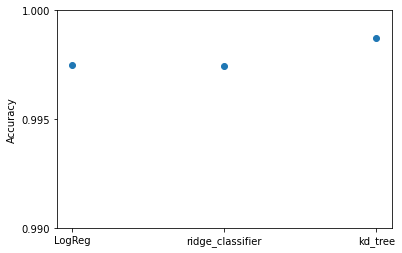

In [62]:
fig, ax = plt.subplots()

ax.scatter(y = [i['acc'] for i in result_list[0].values()],x = [1,2,3])
#plt.set_yticks([0.95, 0975.,1.0])
ax.set_xticks([1,2,3])
ax.set_xticklabels(result_list[0].keys())
ax.set_yticks([0.99, 0.995,1.0])
ax.set_ylabel("Accuracy")
fig.show()

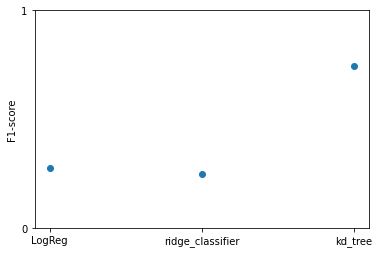

In [64]:
fig, ax1 = plt.subplots()

ax1.scatter(y = [i['f1'] for i in result_list[0].values()],x = [1,2,3])
#plt.set_yticks([0.95, 0975.,1.0])
ax1.set_xticks([1,2,3])
ax1.set_xticklabels(result_list[0].keys())
ax1.set_yticks([0.0, 1.0])
ax1.set_ylabel("F1-score")
fig.show()

In [39]:
_

[{'LogReg': {'acc': 0.9975084915229154, 'f1': 0.27589824285339626},
  'ridge_classifier': {'acc': 0.9974597622734541, 'f1': 0.2499333866240341},
  'kd_tree': {'acc': 0.9987113820698019, 'f1': 0.7468085106382978}}]